In [84]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [86]:
#pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textstat import flesch_reading_ease
from matplotlib.pyplot import figure

In [2]:
full = pd.read_csv('../Data/cleaned_full.csv') 

In [3]:
boxing = pd.read_csv('../Data/Boxing.csv') #this was used for a futher graph later down

In [4]:
mma = pd.read_csv('../Data/MMA.csv') #this was used for a futher graph later down

In [5]:
full.head()

,title,created_utc,subreddit
0,link aj fight,1607797428,Boxing
1,report ben askren box jake paul march,1608735186,MMA
2,please someone hook stream,1607813046,Boxing
3,subreddit paulie malignaggi botched face sparr...,1607786276,Boxing
4,shot campbell explanation luke body went hook,1609746455,Boxing


In [6]:
full = full.dropna() #dropping any nulls

In [7]:
clean_box = full[full['subreddit'] != 'MMA'] #organizing the two subreddits

In [8]:
clean_mma = full[full['subreddit'] != 'Boxing']

In [9]:
all_words = " ".join(full.title).split() #checking word frequency 
all_words

['link',
 'aj',
 'fight',
 'report',
 'ben',
 'askren',
 'box',
 'jake',
 'paul',
 'march',
 'please',
 'someone',
 'hook',
 'stream',
 'subreddit',
 'paulie',
 'malignaggi',
 'botched',
 'face',
 'sparring',
 'conor',
 'profile',
 'picture',
 'shot',
 'campbell',
 'explanation',
 'luke',
 'body',
 'went',
 'hook',
 'fury',
 'dismantled',
 'wilder',
 'arguably',
 'competition',
 'fury',
 'conversation',
 'top',
 'heavyweight',
 'time',
 'dustin',
 'poirier',
 'past',
 'weekend',
 'w',
 'theo',
 'von',
 'mike',
 'tyson',
 'say',
 'boxing',
 'owes',
 'jake',
 'paul',
 'logan',
 'paul',
 'ksi',
 'amp',
 'youtube',
 'boxer',
 'ufc',
 'kicking',
 'butt',
 'anybody',
 'link',
 'tyson',
 'fight',
 'tonight',
 'mike',
 'tyson',
 'lb',
 'roy',
 'jones',
 'jr',
 'lb',
 'weigh',
 'wonderboy',
 'v',
 'stylebender',
 'ufc',
 'lightweight',
 'vhs',
 'style',
 'addition',
 'r',
 'mma',
 'mark',
 'coleman',
 'brutally',
 'end',
 'igor',
 'vovchanchyn',
 'fight',
 'unbeaten',
 'streak',
 'knee',
 'fall

In [10]:
box_words = " ".join(clean_box.title).split() #checking word frequency
box_words

['link',
 'aj',
 'fight',
 'please',
 'someone',
 'hook',
 'stream',
 'subreddit',
 'paulie',
 'malignaggi',
 'botched',
 'face',
 'sparring',
 'conor',
 'profile',
 'picture',
 'shot',
 'campbell',
 'explanation',
 'luke',
 'body',
 'went',
 'hook',
 'fury',
 'dismantled',
 'wilder',
 'arguably',
 'competition',
 'fury',
 'conversation',
 'top',
 'heavyweight',
 'time',
 'mike',
 'tyson',
 'say',
 'boxing',
 'owes',
 'jake',
 'paul',
 'logan',
 'paul',
 'ksi',
 'amp',
 'youtube',
 'boxer',
 'ufc',
 'kicking',
 'butt',
 'anybody',
 'link',
 'tyson',
 'fight',
 'tonight',
 'mike',
 'tyson',
 'lb',
 'roy',
 'jones',
 'jr',
 'lb',
 'weigh',
 'devin',
 'haney',
 'teofimo',
 'request',
 'block',
 'fight',
 'lopez',
 'get',
 'fight',
 'josh',
 'taylor',
 'someone',
 'explain',
 'tyson',
 'jones',
 'jr',
 'fight',
 'called',
 'draw',
 'jake',
 'paul',
 'compared',
 'muhammed',
 'ali',
 'two',
 'people',
 'major',
 'difference',
 'skill',
 'jake',
 'never',
 'thought',
 'real',
 'pro',
 'boxer

In [11]:
mma_words = " ".join(clean_mma.title).split() #checking word frequency
mma_words

['report',
 'ben',
 'askren',
 'box',
 'jake',
 'paul',
 'march',
 'dustin',
 'poirier',
 'past',
 'weekend',
 'w',
 'theo',
 'von',
 'wonderboy',
 'v',
 'stylebender',
 'ufc',
 'lightweight',
 'vhs',
 'style',
 'addition',
 'r',
 'mma',
 'mark',
 'coleman',
 'brutally',
 'end',
 'igor',
 'vovchanchyn',
 'fight',
 'unbeaten',
 'streak',
 'knee',
 'fall',
 'rope',
 'celebration',
 'pride',
 'grand',
 'prix',
 'final',
 'got',
 'bus',
 'rampage',
 'jackson',
 'get',
 'netted',
 'national',
 'tv',
 'forrest',
 'griffin',
 'anthony',
 'pettis',
 'stressed',
 'contract',
 'chopping',
 'block',
 'long',
 'time',
 'performance',
 'going',
 'dictate',
 'happens',
 'next',
 'five',
 'half',
 'month',
 'ago',
 'ji',
 'proch',
 'zka',
 'made',
 'unusual',
 'spectacular',
 'ufc',
 'debut',
 'fan',
 'choice',
 'winner',
 'michael',
 'chiesa',
 'love',
 'analyst',
 'end',
 'goal',
 'ufc',
 'commentary',
 'interesting',
 'stat',
 'tuf',
 'finale',
 'jesse',
 'taylor',
 'ufc',
 'took',
 'dhiego',
 'li

In [12]:
all_dict = {} #making a dictionary of all the words 
for word in all_words:
    if word in all_dict:
        all_dict[word] = all_dict[word] + 1
    else:
        all_dict[word] = 1

In [13]:
box_dict = {} #making a dictionary of all the words 
for word in box_words: 
    if word in box_dict:
        box_dict[word] = box_dict[word] + 1
    else:
        box_dict[word] = 1

In [14]:
mma_dict = {} #making a dictionary of all the words 
for word in mma_words:
    if word in mma_dict:
        mma_dict[word] = mma_dict[word] + 1
    else:
        mma_dict[word] = 1

In [15]:
max(all_dict, key=all_dict.get) #most frequent word

'v'

In [16]:
max(box_dict, key=box_dict.get) #most frequent word

'v'

In [17]:
max(mma_dict, key=mma_dict.get) #most frequent word

'ufc'

In [18]:
all_words_freq = sorted(all_dict.items(), key=lambda x: x[1], reverse=True) #sorting these dictionaries by frequency 

for i in all_words_freq[:20]:
    print(i[0], i[1])

v 1671
fight 1611
ufc 1061
boxing 710
mma 526
tyson 507
fighter 415
paul 408
mike 362
year 324
canelo 284
garcia 280
one 280
mcgregor 273
jones 267
jake 266
conor 251
would 240
amp 239
best 234


In [19]:
box_words_freq = sorted(box_dict.items(), key=lambda x: x[1], reverse=True)

for i in box_words_freq[:20]:
    print(i[0], i[1])

v 1006
fight 775
boxing 641
tyson 489
mike 289
canelo 281
garcia 273
paul 261
jr 228
joshua 215
fury 210
jones 189
mayweather 187
boxer 175
ryan 165
jake 154
anthony 151
would 146
floyd 144
spence 130


In [20]:
mma_words_freq = sorted(mma_dict.items(), key=lambda x: x[1], reverse=True)

for i in mma_words_freq[:20]:
    print(i[0], i[1])

ufc 1041
fight 836
v 665
mma 503
fighter 305
mcgregor 242
conor 224
khabib 205
year 194
dana 188
one 179
white 151
paul 147
amp 138
event 135
tony 126
get 122
new 116
spoiler 115
jake 112


In [21]:
box_freq_df = pd.DataFrame(box_words_freq, columns=['word','count']) #making these into data frames for graphing
box_freq_df

,word,count
0,v,1006
1,fight,775
2,boxing,641
3,tyson,489
4,mike,289
...,...,...
5408,overcome,1
5409,upvoted,1
5410,wbva,1
5411,insisted,1


In [22]:
mma_freq_df = pd.DataFrame(mma_words_freq, columns=['word','count']) #making these into data frames for graphing
mma_freq_df

,word,count
0,ufc,1041
1,fight,836
2,v,665
3,mma,503
4,fighter,305
...,...,...
6725,unarmed,1
6726,banning,1
6727,listed,1
6728,inch,1


In [23]:
all_freq_df = pd.DataFrame(all_words_freq, columns=['word','count']) #making these into data frames for graphing
all_freq_df

,word,count
0,v,1671
1,fight,1611
2,ufc,1061
3,boxing,710
4,mma,526
...,...,...
9383,upvoted,1
9384,wbva,1
9385,insisted,1
9386,northcut,1


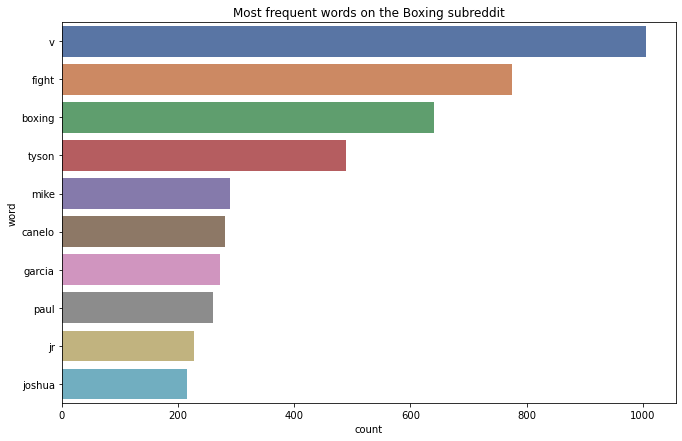

In [24]:
plt.figure(figsize=(11,7))
sns.barplot(x='count', y='word', data=box_freq_df[:10], palette='deep', orient='h')
plt.title('Most frequent words on the Boxing subreddit');

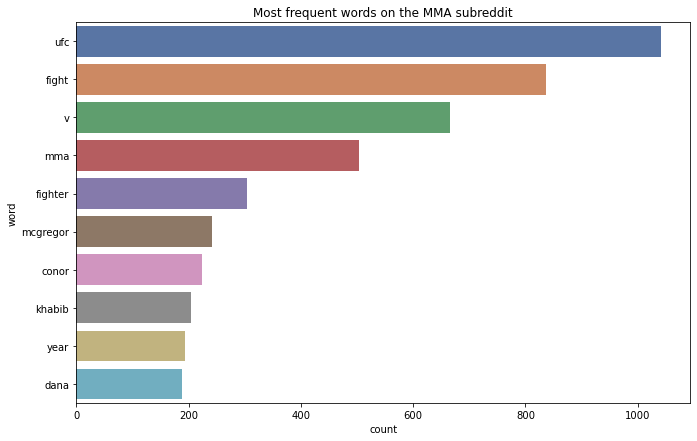

In [25]:
plt.figure(figsize=(11,7))
sns.barplot(x='count', y='word', data=mma_freq_df[:10], palette='deep', orient='h')
plt.title('Most frequent words on the MMA subreddit');

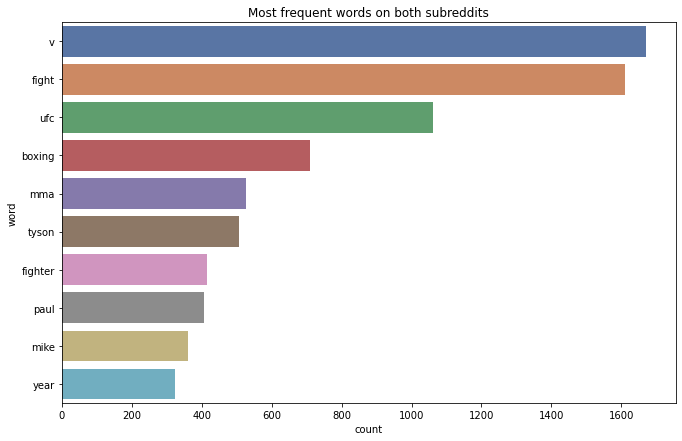

In [26]:
plt.figure(figsize=(11,7))
sns.barplot(x='count', y='word', data=all_freq_df[:10], palette='deep', orient='h')
plt.title('Most frequent words on both subreddits');

In [27]:
clean_box.head()

,title,created_utc,subreddit
0,link aj fight,1607797428,Boxing
2,please someone hook stream,1607813046,Boxing
3,subreddit paulie malignaggi botched face sparr...,1607786276,Boxing
4,shot campbell explanation luke body went hook,1609746455,Boxing
5,fury dismantled wilder arguably competition fu...,1607597579,Boxing


In [28]:
box_cloud = clean_box['title'].sum()

In [29]:
all_cloud = full['title'].sum()

In [30]:
mma_cloud = clean_mma['title'].sum()

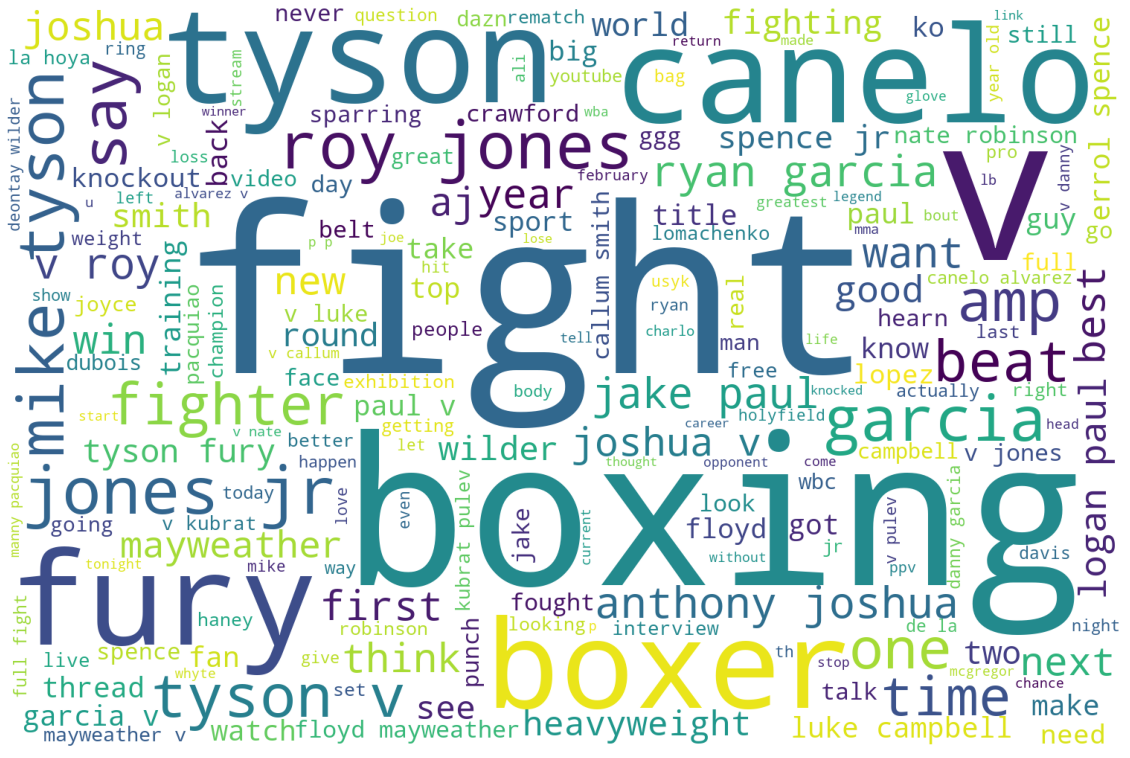

<Figure size 432x288 with 0 Axes>

In [31]:
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                min_font_size = 10)
wordcloud.generate(box_cloud)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('box_cloud.jpg')

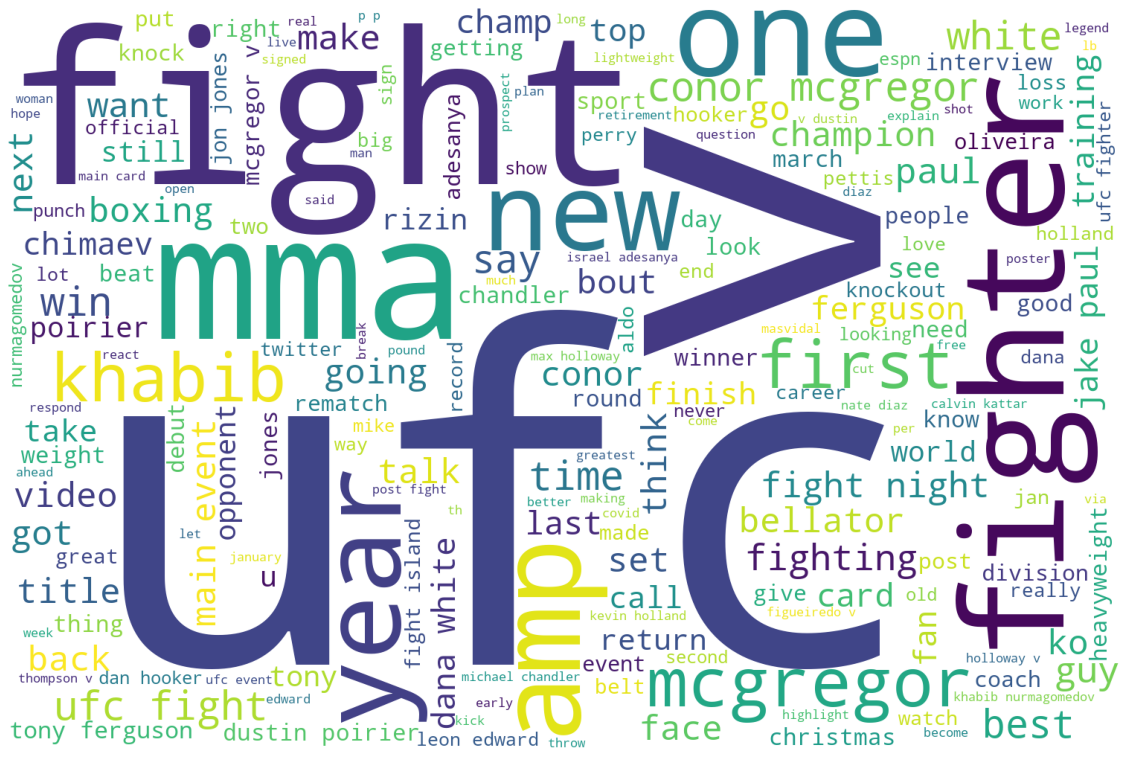

<Figure size 432x288 with 0 Axes>

In [32]:
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                min_font_size = 10)
                
wordcloud.generate(mma_cloud)

plt.figure(figsize=[20,15])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('mma_cloud.jpg')

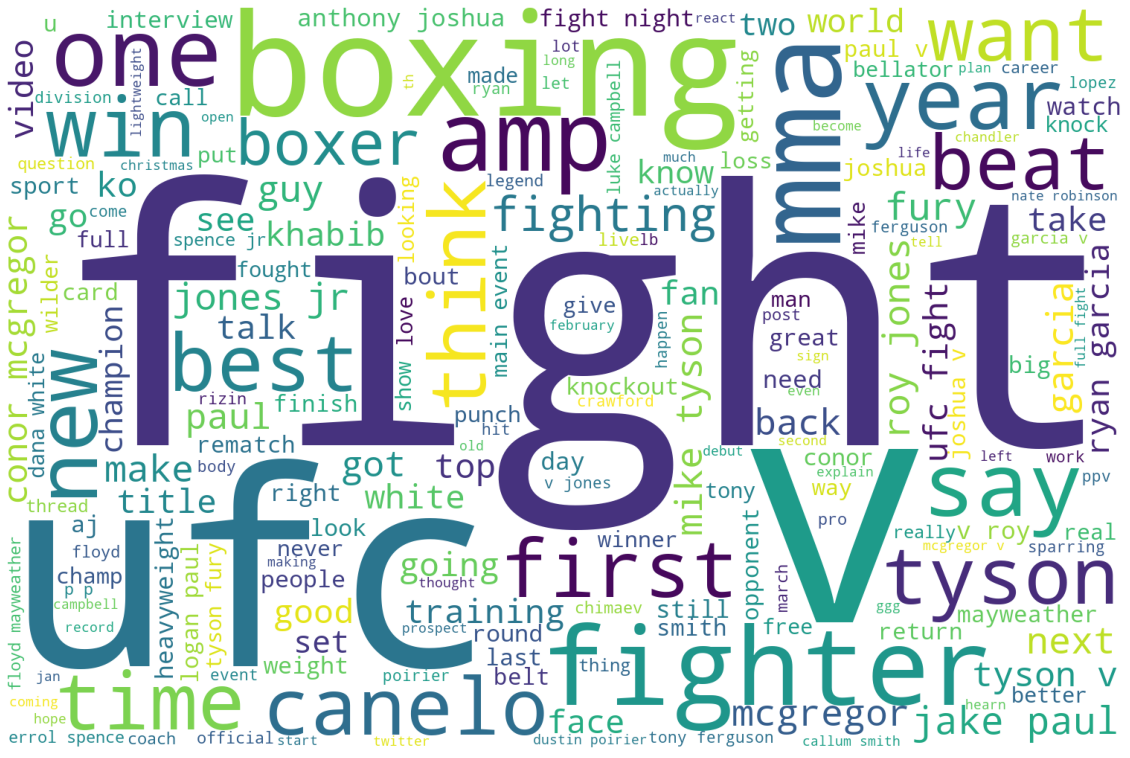

<Figure size 432x288 with 0 Axes>

In [33]:
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                min_font_size = 10)
                
wordcloud.generate(all_cloud)

plt.figure(figsize=[20,15])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('all_cloud.jpg')

Text(0.5, 1.0, 'Boxing title variation')

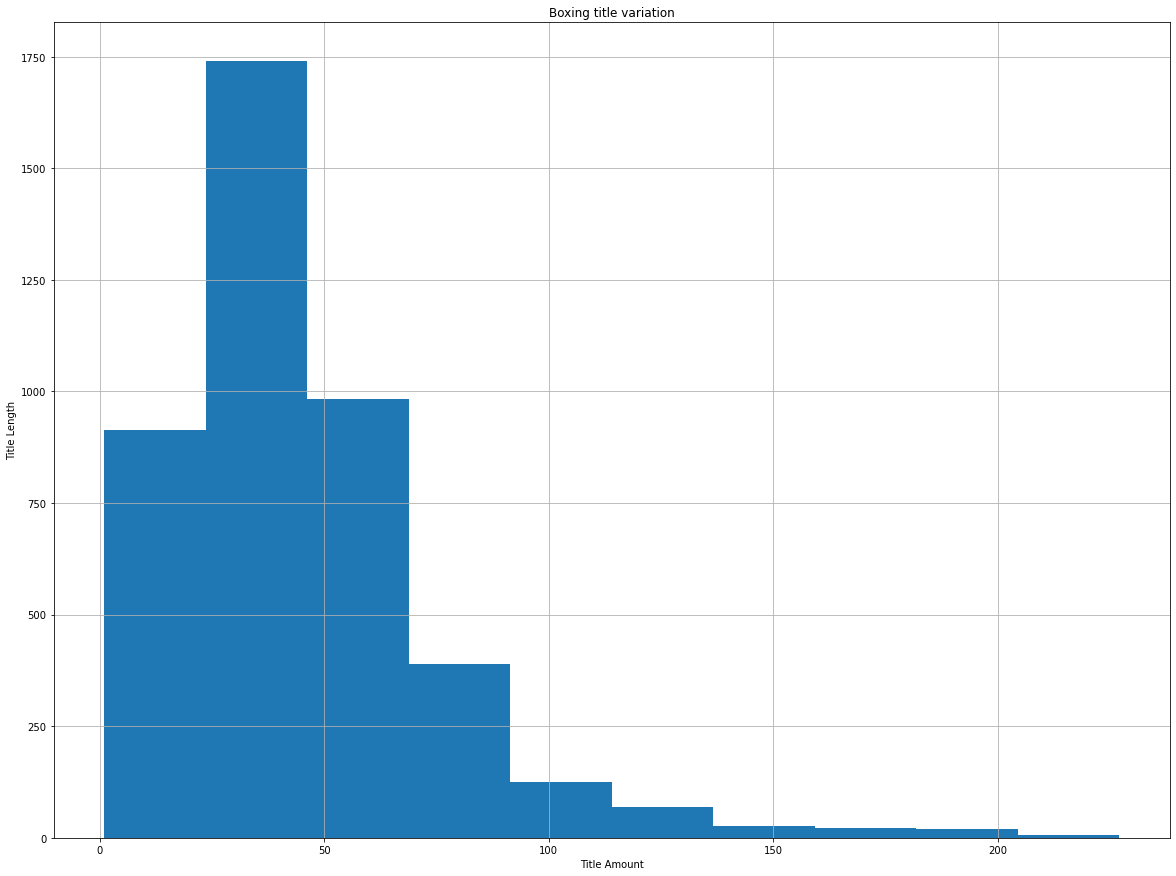

In [34]:
plt.figure(figsize=(20,15))
clean_box['title'].str.len().hist()
plt.xlabel("Title Amount")
plt.ylabel("Title Length")
plt.title("Boxing title variation")

Text(0.5, 1.0, 'MMA word variation')

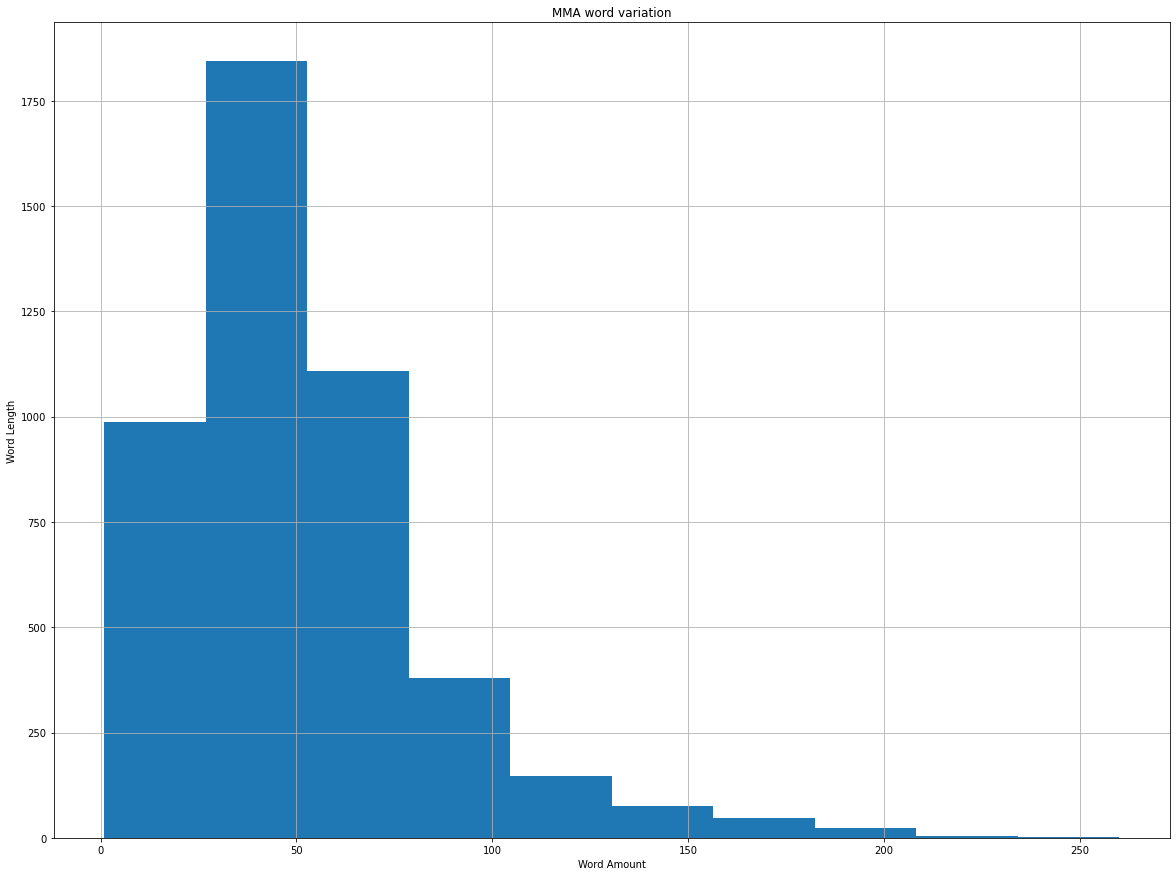

In [35]:
plt.figure(figsize=(20,15))
clean_mma['title'].str.len().hist()
plt.xlabel("Word Amount")
plt.ylabel("Word Length")
plt.title("MMA word variation")

In [82]:
clean_box.isna().sum()

title          0
created_utc    0
subreddit      0
dtype: int64

Text(0.5, 1.0, 'MMA post difficulty')

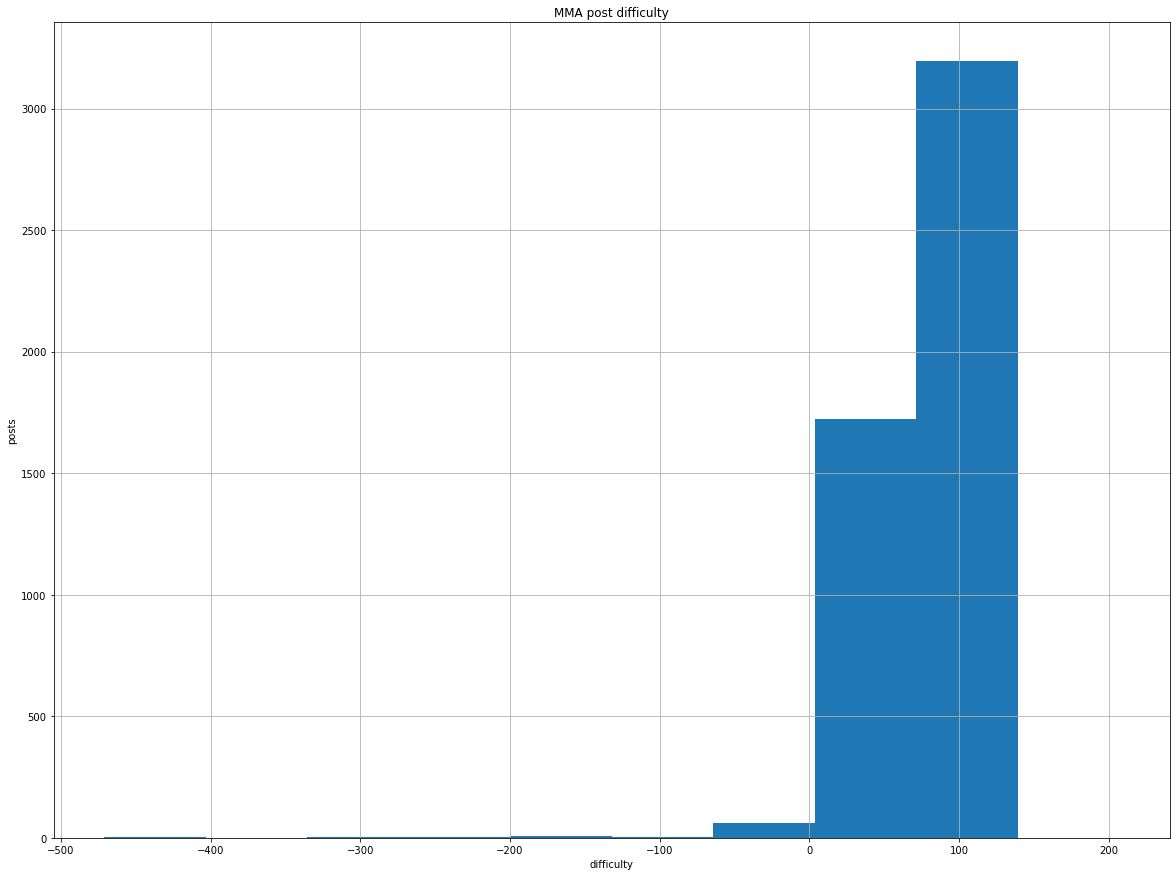

In [39]:
plt.figure(figsize=(20,15)) #graph used for rougher data
boxing['title'].\
   apply(lambda x : flesch_reading_ease(x)).hist()
plt.xlabel("difficulty")
plt.ylabel("posts")
plt.title("MMA post difficulty")

Text(0.5, 1.0, 'Boxing post difficulty')

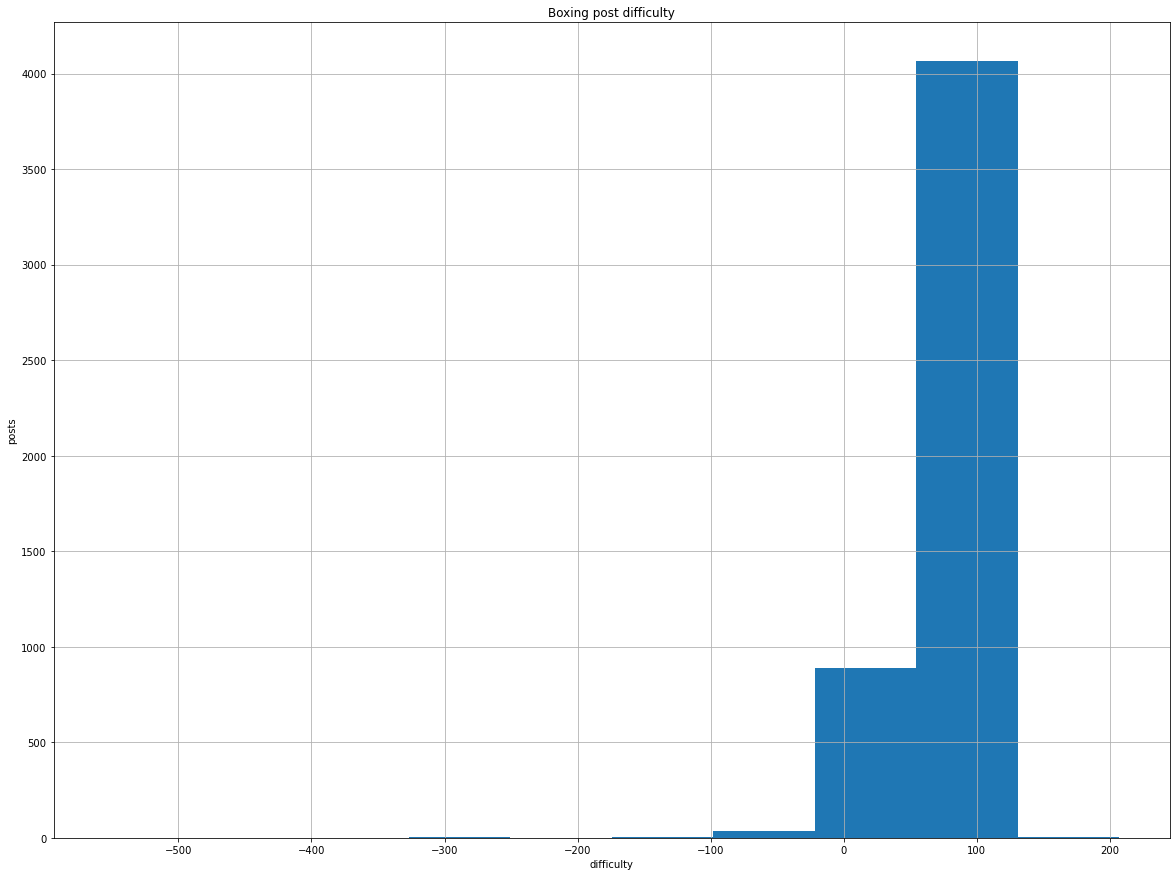

In [37]:
plt.figure(figsize=(20,15))
mma['title'].\
   apply(lambda x : flesch_reading_ease(x)).hist()
plt.xlabel("difficulty")
plt.ylabel("posts")
plt.title("Boxing post difficulty")